# Método de la secante.
El algoritmo de la secante parte de una premisa muy similar al algoritmo de Newton-Raphson, con la particularidad de que en vez de utilizar la derivada de la función para calcular las sucesivas iteraciones usa una aproximación a dicha derivada, en otras palabras, una recta secante. La fórmula del algoritmo puede plantearse como: 
$$ x_{n+1} = x_n - \frac{f(x_n)(x_n-x_{n-1})}{f(x_n)-f(x_{n-1})} $$
Para la implementación se inicia con agregar las librerías a utilizar y algunas funciones utilitarias.

In [1]:
import pandas as pd
import sympy as sp
import numpy as np 
import os as os
import matplotlib.pyplot as plt
from cmath import *

pd.set_option("display.precision", 10)

# devuelve un diccionario donde cada llave es un elemento de la tupla y cada elemento una lista vacía
def create_dictionary(tuple):
    result = {}
    for key in tuple:
        result.setdefault(key, [])
    return result

# agrega los datos especificados a una tabla
def add_info(dictionary, columns, data):
    i = 0
    for c in columns:
        dictionary[c].append(data[i])
        i += 1

# Graphs
def draw_graph(f_s, a, b):
    xarr = np.linspace(a,b,10000)
    x = sp.Symbol("x")
    g = sp.lambdify(x,f_s)
    out = g(xarr)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(xarr,out, 'g')

    # show the plot
    plt.show()

Como datos de entrada del algoritmo se necesita dos puntos distintos en los que evaluar la función, una tolerancia especificada y una cadena con la función a investigar de forma simbólica.

Para el algoritmo se espera recibir como valores de retorno:
* Cantidad total de iteraciones.
* Valores de ambos nodos y su respectiva imagen según se realizan las iteraciones

La condición de paro es que $|x-x_{n}| \le \epsilon$

In [2]:
# función para buscar una raíz con el método de la secante.
# recibe un string con la función, una tolerancia, dos puntos y un parámetro opcional con la cantidad de iteraciones
def secant(f_s, tol, x_0, x_1, max_it = 100):
    columns = ("it", "x_n-1", "x_n-2","f(x_n-1)","f(x_n-2)","x_n","error")
    table = create_dictionary(columns)
    x = sp.Symbol("x")
    f_ = sp.sympify(f_s)
    f = sp.lambdify(x,f_)
    i = 0
    x0 = x_0
    x1 = x_1
    xn = 0
    xn1 = 1e9
    error = abs(xn-xn1) # se asume un error muy grande al iniciar las iteraciones
    q0 = f(x0)
    q1 = f(x1)
    data = []
    while error > tol and i < max_it:
        xn = x1 - q1*(x1-x0)/(q1-q0)
        error = abs(xn-xn1)
        data = [i, x1, x0, q0, q1, xn, error]
        add_info(table, columns, data)
        x0, x1 = x1, xn
        q0 = q1
        q1 = f(xn)
        xn1 = xn
        i += 1
    if (i == max_it):
        print("no se pudo encontrar una raíz con la precisión especificada.")
    
    df = pd.DataFrame(table)
    display(df)

Buscando una raíz de la función:
$$e^{x} + 2^{-x} + 2\cos{x} - 6$$

In [4]:
x_0 = 1
x_1 = 1.5
tol = 1e-14
# Definiendo un string que representa la función de forma simbólica utilizando x como variable
f_string = "exp(x) + (2**(-x)) + 2*cos(x) - 6"

secant(f_string,tol,x_0,x_1)

,it,x_n-1,x_n-2,f(x_n-1),f(x_n-2),x_n,error
0,0,1.5000000000,1.0000000000,-1.7011135598e+00,-1.0232831357e+00,2.2548223710,9.9999999775e+08
1,1,2.2548223710,1.5000000000,-1.0232831357e+00,2.4792853722e+00,1.7205230250,5.3429934601e-01
2,2,1.7205230250,2.2548223710,2.4792853722e+00,-4.0744701707e-01,1.7959365533,7.5413528308e-02
3,3,1.7959365533,1.7205230250,-4.0744701707e-01,-1.3338660689e-01,1.8326407043,3.6704150913e-02
4,4,1.8326407043,1.7959365533,-1.3338660689e-01,1.3395527333e-02,1.8292910360,3.3496682645e-03
5,5,1.8292910360,1.8326407043,1.3395527333e-02,-3.7962972217e-04,1.8293833495,9.2313548767e-05
6,6,1.8293833495,1.8292910360,-3.7962972217e-04,-1.0351804838e-06,1.8293836020,2.5241035861e-07
7,7,1.8293836020,1.8293833495,-1.0351804838e-06,8.0331963304e-11,1.8293836019,1.9586110511e-11
8,8,1.8293836019,1.8293836020,8.0331963304e-11,-2.2204460493e-16,1.8293836019,0.0000000000e+00


Gráficando la función, podemos corroborar que esa es la raíz encontrada es correcta:

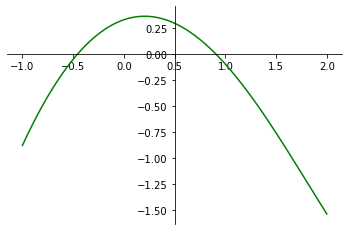

In [8]:
draw_graph(f_string,-1,2)

Continuando con los ejemplos, utilizaremos la función: $$ f(x) = \sqrt[3]{e^x - 3x^2} $$
Contenida entre $ [2.5,5] $ con una presición $\epsilon = 10^{-6}$

In [6]:
x_0 = 2.5
x_1 = 5
tol = 1e-6
# Definiendo un string que representa la función de forma simbólica utilizando x como variable
f_string = "(exp(x) - 3 * x**2)**1/3"

secant(f_string,tol,x_0,x_1)

,it,x_n-1,x_n-2,f(x_n-1),f(x_n-2),x_n,error
0,0,5.0000000000,2.5000000000,-2.1891686798,24.4710530342,2.7052841780,9.9999999729e+08
1,1,2.7052841780,5.0000000000,24.4710530342,-2.3323734897,2.9049651533,1.9968097530e-01
2,2,2.9049651533,2.7052841780,-2.3323734897,-2.3506201486,-22.8188741999,2.5723839353e+01
3,3,-22.8188741999,2.9049651533,-2.3506201486,-520.7010197519,3.0216178560,2.5840492056e+01
4,4,3.0216178560,-22.8188741999,-520.7010197519,-2.2886843092,3.1356983373,1.1408048125e-01
5,5,3.1356983373,3.0216178560,-2.2886843092,-2.1643723057,5.1219315828,1.9862332455e+00
6,6,5.1219315828,3.1356983373,-2.1643723057,29.6521182316,3.2708153208,1.8511162620e+00
7,7,3.2708153208,5.1219315828,29.6521182316,-1.9206327717,3.3834223774,1.1260705653e-01
8,8,3.3834223774,3.2708153208,-1.9206327717,-1.6237265913,3.9992501511,6.1582777377e-01
9,9,3.9992501511,3.3834223774,-1.6237265913,2.1917399013,3.6454967355,3.5375341566e-01


Gráficando la función, podemos corroborar que esa es la raíz encontrada es correcta:

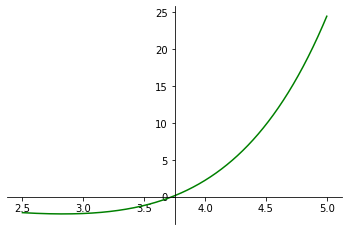

In [7]:
draw_graph(f_string,x_0,x_1)

### Problema de aplicación

La descarga de un tanque cilíndrico a través de un tubo largo puede ser descrito con la ecuación:

$$ \sqrt{2gH} \tanh(\frac{\sqrt{2gH}}{2L}t) $$


donde $g=9.8\frac{m}{s^2}$, *H* es la carga hidrostática inicial en metros, *L* es la longitud del tubo en metros, y *t* el tiempo transcurrido en segundos. Determine la carga hidrostática necesaria para obtener $v = 5\frac{m}{s} $ en 2.5 s para un tubo de 4 metros de longitud. 
Utilizar los valores iniciales de $x_0 = 0$ y $x_1 = 2$ con un criterio de detención $\epsilon = 10^{-5}$

Para resolver el problema, sustituimos los valores conocidos dentro de la ecuación 

$$ 
5 = \sqrt{2(9.8)H} \tanh( \frac{ \sqrt{2(9.8)H} }{2(4)} (2.5)) \\
5 = \sqrt{19.6H} \tanh( \frac{ \sqrt{19.6H} }{8} (2.5))
$$

Luego igualamos a 0, y obtenemos la ecuación con la que vamos a trabajar

$$ 0 = \sqrt{19.6H} \tanh( \frac{ \sqrt{19.6H} }{8} (2.5)) - 5 $$

In [13]:
x_0 = 0
x_1 = 2
tol = 1e-5

# Definiendo un string que representa la función de forma simbólica utilizando x como variable
h = "sqrt(19.6*x) * tanh( ((sqrt(19.6*x))/8)*2.5 ) - 5"

secant(h, tol, x_0, x_1)

,it,x_n-1,x_n-2,f(x_n-1),f(x_n-2),x_n,error
0,0,2.0000000000,0.0000000000,-5.0000000000,1.0157249779,1.6623100352,9.9999999834e+08
1,1,1.6623100352,2.0000000000,1.0157249779,0.3946152022,1.4477624642,2.1454757103e-01
2,2,1.4477624642,1.6623100352,0.3946152022,-0.0414692241,1.4681647550,2.0402290841e-02
3,3,1.4681647550,1.4477624642,-0.0414692241,0.0016291122,1.4673935508,7.7120427734e-04
4,4,1.4673935508,1.4681647550,0.0016291122,0.0000066313,1.4673903988,3.1519937058e-06


Gráficando, podemos ver que la función encontrada es la correcta

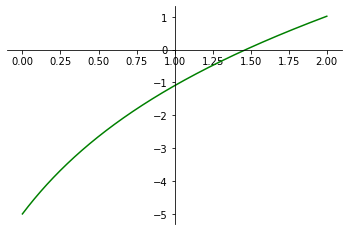

In [14]:
draw_graph(h,x_0,x_1)